In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Shreyash/Desktop/ML_lab/Mall_Customers.csv")

In [4]:
df.shape


(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df["A"]= df[["Annual Income (k$)"]]
df["B"]=df[["Spending Score (1-100)"]]

X=df[["A","B"]]
X.head()


,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

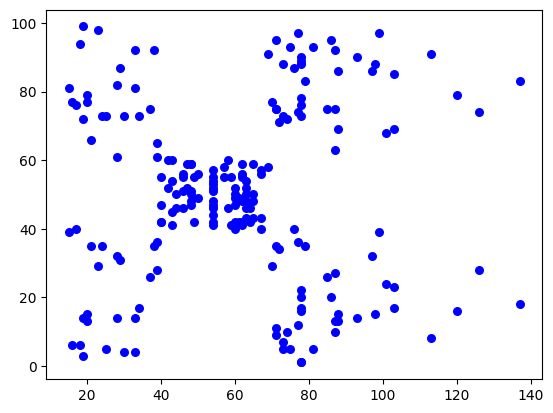

In [10]:
plt.scatter(X["A"], X["B"], s = 30, c = 'b')
plt.show()

In [11]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)
centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [12]:
clusters = Kmean.fit_predict(X)
df["label"] = clusters
df.head(100)

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,4
1,2,Male,21,15,81,15,81,3
2,3,Female,20,16,6,16,6,4
3,4,Female,23,16,77,16,77,3
4,5,Female,31,17,40,17,40,4
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,0
96,97,Female,47,60,47,60,47,0
97,98,Female,27,60,50,60,50,0
98,99,Male,48,61,42,61,42,0


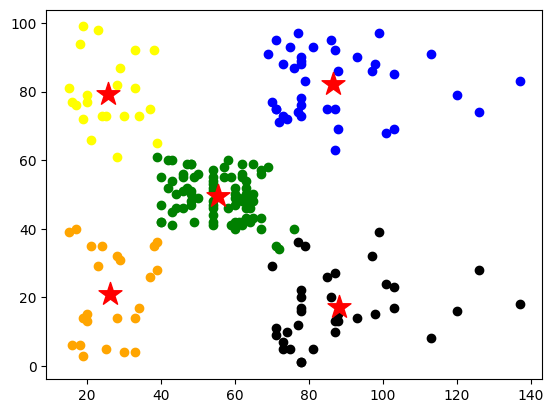

In [13]:
col=['green','blue','black','yellow','orange',]

for i in range(5):
    a=col[i]
    # print(a)
    plt.scatter(df.A[df.label==i], df.B[df.label == i], c=a, label='cluster 1')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300,
                c='r', label='centroid')